In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

### Estudo com diferentes algoritmos de machine learning em três bases dferentes

<p style="color:blue">Base de dados: Credit</p>
<p style="color:red">Base de dados: CENSUS</p>
<p style="color:green">Base de dados: Risco de credito</p>


In [2]:
# Base de dados Credit
base_credit = pd.read_csv('base_credit.csv')
base_credit.head()

,Unnamed: 0,clientid,income,age,loan,default
0,0,1,66155.925095,59.017015,8106.532131,0
1,1,2,34415.153966,48.117153,6564.745018,0
2,2,3,57317.170063,63.108049,8020.953296,0
3,3,4,42709.534201,45.751972,6103.642260,0
4,4,5,66952.688845,18.584336,8770.099235,1


In [3]:
# Base de dados Census
base_census = pd.read_csv('Bases de dados/census.csv')
base_census.head()

,age,workclass,final-weight,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loos,hour-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [4]:
# Base de dados Risco de Credito
base_risco_credito = pd.read_csv('Bases de dados/risco_credito.csv')
base_risco_credito.head()

,historia,divida,garantias,renda,risco
0,ruim,alta,nenhuma,0_15,alto
1,desconhecida,alta,nenhuma,15_35,alto
2,desconhecida,baixa,nenhuma,15_35,moderado
3,desconhecida,baixa,nenhuma,acima_35,alto
4,desconhecida,baixa,nenhuma,acima_35,baixo


# Regressão logística

In [5]:
from sklearn.linear_model import LogisticRegression

## Base risco de crédito

In [6]:
import pickle
with open('risco_credito.pkl', 'rb') as f:
    x_risco_credito, y_risco_credito = pickle.load(f)

In [7]:
y_risco_credito #vamos apagar o registro 2 7 e 11

array(['alto', 'alto', 'moderado', 'alto', 'baixo', 'baixo', 'alto',
       'moderado', 'baixo', 'baixo', 'alto', 'moderado', 'baixo', 'alto'],
      dtype=object)

In [8]:
x_risco_credito = np.delete(x_risco_credito,[2,7,11], axis = 0)
y_risco_credito = np.delete(y_risco_credito,[2,7,11], axis = 0)

In [9]:
logistic_risco_credit = LogisticRegression(random_state= 1)
logistic_risco_credit.fit(x_risco_credito,y_risco_credito)

LogisticRegression(random_state=1)

In [10]:
logistic_risco_credit.intercept_

array([-0.80828993])

In [11]:
logistic_risco_credit.coef_

array([[-0.76704533,  0.23906678, -0.47976059,  1.12186218]])

In [12]:
# historia boa(0), divida alta(0), garantias nenhuma(1), renda > 35(2)
# historia ruim(2), divida alta(0), garantias adequadas(0), renda < 35(0) 
previsoes1 = logistic_risco_credit.predict([[0,0,1,2],[2,0,0,0]])
previsoes1

array(['baixo', 'alto'], dtype=object)

## Base credit data

In [13]:
with open('credit.pkl', 'rb') as f: #Chama a variavel salva com todas as configurações do algoritmo 
    x_credit_treinamento, y_credit_treinamento, x_credit_teste, y_credit_teste = pickle.load(f)

In [14]:
x_credit_treinamento.shape,y_credit_treinamento.shape

((1500, 3), (1500,))

In [15]:
logistic_credit = LogisticRegression(random_state=1)
logistic_credit.fit(x_credit_treinamento,y_credit_treinamento)

LogisticRegression(random_state=1)

In [16]:
logistic_credit.intercept_

array([-6.02976095])

In [17]:
logistic_credit.coef_

array([[-2.54927091, -3.72279861,  3.93940349]])

In [18]:
previsoes = logistic_credit.predict(x_credit_teste)

In [19]:
from sklearn.metrics import accuracy_score, classification_report
accuracy_score(y_credit_teste,previsoes)

0.946

0.946

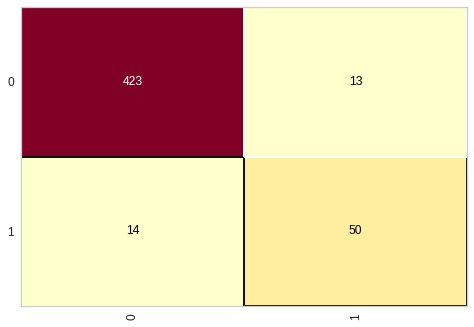

In [20]:
from yellowbrick.classifier import ConfusionMatrix
cm = ConfusionMatrix(logistic_credit)
cm.fit(x_credit_treinamento, y_credit_treinamento)
cm.score(x_credit_teste, y_credit_teste)

In [21]:
print(classification_report(y_credit_teste,previsoes))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97       436
           1       0.79      0.78      0.79        64

    accuracy                           0.95       500
   macro avg       0.88      0.88      0.88       500
weighted avg       0.95      0.95      0.95       500



## Base census

In [22]:
with open('census.pkl', 'rb') as f:
    x_census_treinamento,x_census_teste,y_census_treinamento,y_census_teste = pickle.load(f)

In [23]:
x_census_treinamento.shape,y_census_treinamento.shape

((27676, 108), (27676,))

In [24]:
logistic_census = LogisticRegression(random_state= 1)
logistic_census.fit(x_census_treinamento,y_census_treinamento)

LogisticRegression(random_state=1)

In [25]:
previsoes = logistic_census.predict(x_census_teste)
previsoes

array([' <=50K', ' <=50K', ' <=50K', ..., ' <=50K', ' <=50K', ' >50K'],
      dtype=object)

In [26]:
accuracy_score(y_census_teste,previsoes)

0.849539406345957

0.849539406345957

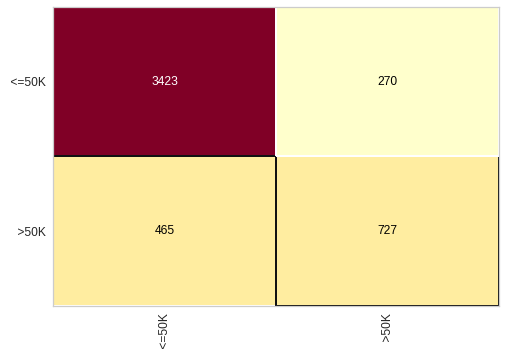

In [27]:
from yellowbrick.classifier import ConfusionMatrix
cm = ConfusionMatrix(logistic_census)
cm.fit(x_census_treinamento, y_census_treinamento)
cm.score(x_census_teste, y_census_teste)

In [28]:
print(classification_report(y_census_teste,previsoes))

              precision    recall  f1-score   support

       <=50K       0.88      0.93      0.90      3693
        >50K       0.73      0.61      0.66      1192

    accuracy                           0.85      4885
   macro avg       0.80      0.77      0.78      4885
weighted avg       0.84      0.85      0.84      4885

